# ✨Bienvenidos✨ <img src="https://raw.githubusercontent.com/cgiohidalgo/JupyterHub-nbgrader/main/logo.png" alt="udenar" width="180"/>
<div style="text-align: center"> MODULO DE ANALÍTICA DE DATOS</div>
<div style="text-align: center"> Maestría de Ingeniería de Sistemas y Computación </div>
 <div style="text-align: center">Victor Bucheli (victor.bucheli@correounivalle.edu.co) - Giovanny Hidalgo (carlos.hidalgo@correounivalle.edu.co)
</div>

## _Antes de empezar..._

- Si tiene problemas en ejecutar su código **reinicie el kernel** _(en la barra de menú, seleccione Kernel $\rightarrow$ Restart)_.

- Asegúrese de completar cualquier lugar que diga `Tu código aquí`

- Asegúrese de colocar su nombre 






**Nombre de estudiante =** ""

In [1]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#from sklearn import tree

#
# ==============================================================================
import graphviz #libreria de garficos que se une a matplotlib
from io import StringIO #entrada y salida de datos png
from IPython.display import Image  #graficar con colores
from sklearn.tree import export_graphviz #crear graficos de Tree
import pydotplus  #exportar graficos 
import six   # sklearn.externals.six
import sys   # sklearn.externals.six
sys.modules['sklearn.externals.six'] = six # sklearn.externals.six

# Preprocesado y modelado
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve


# Cargar datos

In [2]:
datos = pd.read_csv("estudiantes_final.csv")

In [3]:
datos

,Error1,Error2,Error3,Aceptado,Parcial1,Parcial2,Final,Tiempo,GanaCurso,Entregas
0,3.0,1.0,0.0,2,3.00,3.000,3.0000,48.97,1,6.0
1,2.0,0.0,1.0,2,4.58,3.788,4.1840,20.35,1,5.0
2,4.0,1.0,0.0,1,3.20,2.877,3.0385,56.01,1,6.0
3,4.0,2.0,0.0,2,4.15,4.008,4.0790,66.62,1,8.0
4,4.0,2.0,0.0,1,3.13,2.827,2.9785,69.71,0,7.0
...,...,...,...,...,...,...,...,...,...,...
652,6.0,3.0,2.0,2,4.00,4.850,4.4242,63.16,1,13.0
653,3.0,1.0,0.0,2,3.08,3.470,3.2775,35.11,1,6.0
654,1.0,1.0,1.0,2,3.92,3.950,3.9360,21.39,1,5.0
655,6.0,3.0,2.0,2,4.68,3.040,3.8613,24.07,1,13.0


# Visualizar datos

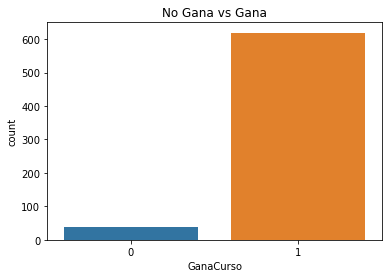

GanaCurso
1    619
0     38
dtype: int64

In [4]:
sns.countplot(x='GanaCurso',data=datos)
plt.title('No Gana vs Gana')
plt.show()
datos.value_counts(datos['GanaCurso'], sort = True) #comparacion de clase 0=pierde 1=gana

<AxesSubplot:xlabel='GanaCurso', ylabel='Density'>

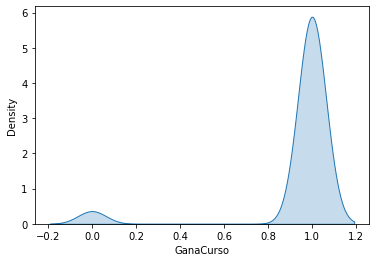

In [5]:
sns.kdeplot(data=datos['GanaCurso'], shade=True)


# Features  y clase 

In [6]:
#Dividir el dataset in features y la clase[0,1]
features = ['Error1', 'Error2', 'Error3', 'Aceptado', 'Parcial1', 'Parcial2','Tiempo'] 
X = datos[features] # Features
y = datos['GanaCurso'] # Target variable

# Dataset de entranamiento y testeo

In [7]:
#datos de entreno y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear modelo y entreno (RANDON FOREST)

In [8]:
# Creaar el modelo 
modelo = RandomForestClassifier(n_estimators=100)

# entretar el modelo
modelo = modelo.fit(X_train,y_train)

#predecir para el dataset de testeo 
y_pred = modelo.predict(X_test)

# Métricas de diagnóstico


## Matriz de confusión

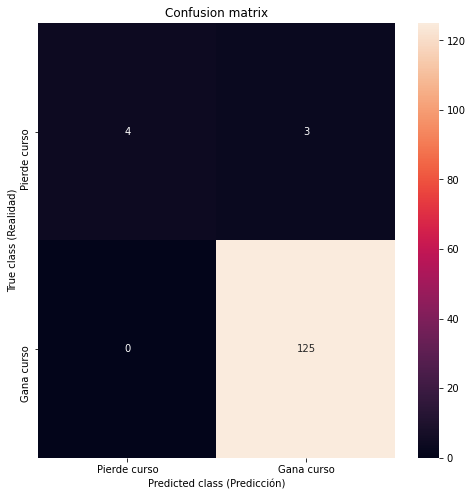

In [9]:
LABELS = ["Pierde curso","Gana curso"]
def mostrar_resultados(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class (Realidad)')
    plt.xlabel('Predicted class (Predicción)')
    plt.show()

y_pred = modelo.predict(X_test)
mostrar_resultados(y_test, y_pred)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.98      1.00      0.99       125

    accuracy                           0.98       132
   macro avg       0.99      0.79      0.86       132
weighted avg       0.98      0.98      0.97       132



# prueba diagnóstica (ROC)

ROC SCORE:  0.7857142857142857


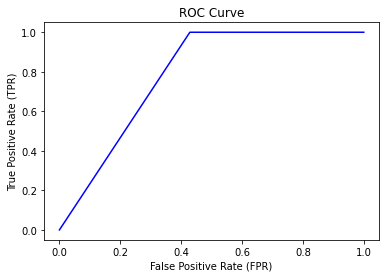

In [11]:
pred = modelo.predict(X_test) # predecir utiizando el dataset X_test
roc_score = roc_auc_score(y_test,pred) #  clauclar auc con n_samples, n_classes
print("ROC SCORE: ",roc_score)
fpr,tpr,threshold = roc_curve(y_test,pred)
plt.clf()
plt.plot(fpr,tpr, color='Blue', label='No Skill')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.show()



# Prueba del modelo


In [12]:
modelo.predict([[3,0,2,1,1,3,10]]) #correcto

array([0], dtype=int64)

In [13]:
modelo.predict([[4,2,0,1,3.13,2.827,69.71]])

array([0], dtype=int64)

In [14]:
modelo.predict([[0,0,9,0,2.5,2.9,19.28]])

array([0], dtype=int64)

In [15]:
modelo.predict([[1,1,1,0,1.9,2.9,78]])

array([0], dtype=int64)

In [16]:
modelo.predict([[0,0,0,2,3,3,55.5]])

array([1], dtype=int64)

In [17]:
modelo.predict([[10,20,1,0,2,2,90]])

array([0], dtype=int64)

In [18]:
modelo.predict([[5,0,1,2,4,4.5,115]])

array([1], dtype=int64)

In [19]:
modelo.predict([[2,2,2,1,2.5,3.5,80]])

array([1], dtype=int64)

In [20]:
modelo.predict([[5,1,0,1,2.2,5,60.5]])

array([1], dtype=int64)

In [21]:
modelo.predict([[6,0,0,0,1.89,1.446,52.59]])

array([0], dtype=int64)